In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Leitura do dataset

In [2]:
lista_espera = pd.read_csv('resultado_lista_de_espera.csv')

In [3]:
lista_espera.drop('Unnamed: 0', axis=1, inplace=True)
lista_espera.head()

,Classif.,Inscr. Enem,Nome do Candidato,Nota,Unidade,Curso,Tipo Curso,Turno,Categoria Concorrência,Situação
0,1,211010235888,ANA LUIZA LEMOS DE OLIVEIRA,642.84,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
1,2,211015922282,KAIO LUCAS ARAUJO SILVA,642.12,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
2,3,211010875618,MIGUEL BARBOSA FARIAS,636.64,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
3,4,211005465250,RAONNY DELLANO MACEDO,633.18,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
4,5,211015847166,KAIO VIEIRA NUNES,632.72,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO


### Medidas de Tendência Central

In [4]:
def media_notas_por_atributo(dataset, atributo):
    atributos = np.unique(dataset[atributo])
    media_atrib = {}
    for atrib in atributos:
        media_atrib[atrib] = np.mean(dataset['Nota'][dataset[atributo] == atrib])
    return media_atrib

In [5]:
def media_classificados_atributo(dataset, atributo):
    classificados = pd.concat([dataset[dataset['Situação'] == 'CLASSIFICADO'], dataset[dataset['Situação'] == 'CLASSIFICADO NA AC']])
    atributos = np.unique(lista_espera[atributo])
    media_classificados_atrib = {}
    for atrib in atributos:
        media_classificados_atrib[atrib] = np.mean(classificados['Nota'][classificados[atributo] == atrib])
    
    return media_classificados_atrib

### Médias por curso

In [6]:
media_por_curso = media_notas_por_atributo(lista_espera, 'Curso')
media_classif_curso = media_classificados_atributo(lista_espera, 'Curso')

In [7]:
media_classif_curso

{'Administração': 652.0701639344261,
 'Agronomia': 597.3422641509435,
 'Análise e Desenvolvimento de Sistemas': 588.1752380952381,
 'Arquitetura e Urbanismo': 678.7317647058824,
 'Biblioteconomia': 604.0924137931036,
 'Biotecnologia': 665.6691666666667,
 'Cinema e Audiovisual': 648.7725,
 'Ciência da Computação': 620.7372549019608,
 'Ciência de Dados': 560.1930434782608,
 'Ciências Ambientais': 603.4980952380952,
 'Ciências Atuariais': 621.8171428571429,
 'Ciências Biológicas - Bacharelado': 657.4344444444445,
 'Ciências Biológicas - Licenciatura': 652.26625,
 'Ciências Contábeis': 639.8805,
 'Ciências Econômicas': 644.5202857142856,
 'Ciências Sociais – Bacharelado': 607.644,
 'Ciências Sociais – Licenciatura': 602.0186666666667,
 'Comunicação Social - Publicidade e Propaganda': 670.988,
 'Dança – Bacharelado': 579.2583333333333,
 'Dança – Licenciatura': 590.6025000000001,
 'Design': 675.1885714285714,
 'Design - Moda': 645.0423999999998,
 'Design Digital': 612.7307142857143,
 'Direit

### Médias por unidade

In [8]:
media_por_unidade = media_notas_por_atributo(lista_espera, 'Unidade')
media_classif_unidade = media_classificados_atributo(lista_espera, 'Unidade')

In [9]:
media_classif_unidade

{'Crateús': 591.6850349650352,
 'Fortaleza': 637.4718201997771,
 'Itapajé': 564.0727272727273,
 'Quixadá': 599.7007079646017,
 'Russas': 588.2585520361991,
 'Sobral': 648.2688}

### Boxplot das notas

In [22]:
def boxplot(entrada):
    plt.boxplot(np.array(list(entrada)))
    plt.show()


	BOXPLOT DAS NOTAS MÉDIAS POR CURSO


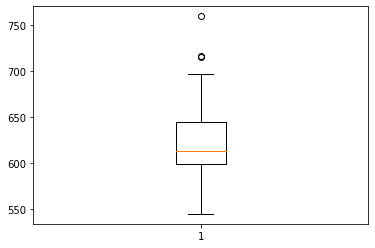

In [31]:
print('\n\tBOXPLOT DAS NOTAS MÉDIAS POR CURSO')
boxplot_curso = boxplot(media_classif_curso.values())


	BOXPLOT DAS NOTAS MÉDIAS POR UNIDADE


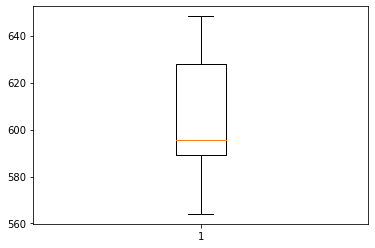

In [32]:
print('\n\tBOXPLOT DAS NOTAS MÉDIAS POR UNIDADE')
boxplot_unidade = boxplot(media_classif_unidade.values())

### Histograma da frequência de candidaturas por concorrência

In [50]:
def histograma_categoria(dataset, attr_categoria):    
    distribuicao_frequencia = dataset[attr_categoria].value_counts()
    
    # tabela de frequência
    print('\n\n{}\n\nTabela de Frequência'.format('*'*100))
    display(pd.DataFrame(distribuicao_frequencia))
    
    # histograma
    print('\n\n{}\n\nHistograma Original \n'.format('*'*100))
    original_hist = plt.barh(np.array(distribuicao_frequencia.keys()), distribuicao_frequencia.values)
    plt.xlabel('Quantidade de candidatos')
    plt.ylabel('Categoria da concorrência')
    plt.title('Distribuição de frequência por categoria')
    plt.show()
    
    # constructing bars with log value to see the bar of categories which has not appeared so frequently
    print('\n\n{}\n\nHistograma com Log \n'.format('*'*100))
    log_values = np.log(distribuicao_frequencia.values)
    plt.xlabel('Quantidade de candidatos na escala log')
    plt.ylabel('Categoria da concorrência')
    plt.title('Distribuição de frequência por categoria')
    log_hist = plt.barh(np.array(distribuicao_frequencia.keys()), log_values)
    plt.show()



****************************************************************************************************

Tabela de Frequência


,Categoria Concorrência
Ampla Concorrência,26458
L2,6089
L1,3444
L6,3311
L5,2817
L10,65
L13,35
L14,34
L9,34




****************************************************************************************************

Histograma Original 



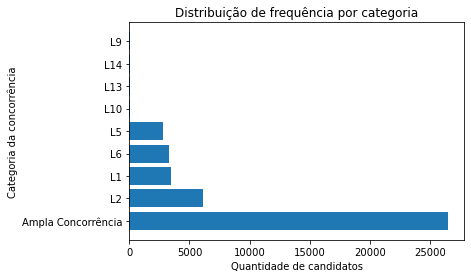



****************************************************************************************************

Histograma com Log 



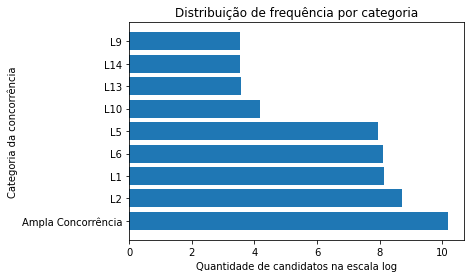

In [51]:
histograma_categoria(lista_espera, 'Categoria Concorrência')

Existe correlação entre nota e curso? Existe correlação entre nota e categoria de concorrência?

     - Point Biserial